In this notebook I'll make a **Modularity analysis**, in order to see clusters.

First, I runned the 'Modularity Statistic' on Gephi and exported the results. 

Then, I opened the CSV and divided the videos per Modularity Class.

Finally I could take two conclusions:
    1. categories associated to certain modularities
    2. channels associated to certain modularities
    3. tags associated to certatin modularities
    
I'll make this analysis in two different datasets:
    * GB + US with weightned edges (1)
    * GB + US with weightned edges except edges whose weight = 1 (2)
    
**(1)** has 15 communities
**(2)** has 27 communities

In [1]:
import pandas as pd
import numpy as np
#1
nodesOriginal1 = pd.read_csv('../CreatedCSVs/GephiNodesGBUS.csv', sep=',', decimal='.', header=0)
nodes1 = nodesOriginal1.loc[:, ['Id','channel_title','category_id','modularity_class']]
edges1 = pd.read_csv('../CreatedCSVs/EdgesWeightnedGBUS.csv', sep=',', decimal='.', header=0)
communities1 = 15
print("Nodes and Edges 1 loaded")

#2
nodesOriginal2 = pd.read_csv('../CreatedCSVs/GephiNodesGBUS-1.csv', sep=',', decimal='.', header=0)
nodes2 = nodesOriginal2.loc[:, ['Id','channel_title','category_id','modularity_class']]
edges2 = pd.read_csv('../CreatedCSVs/GephiEdgesGBUS-1.csv', sep=',', decimal='.', header=0)
communities2 = 27;
print("Nodes and Edges 2 loaded")

Nodes and Edges 1 loaded
Nodes and Edges 2 loaded


Then we need to divide the dataframe in different communities

In [2]:
def subDataframes(nodes, communities):
    subNodes = []
    for i in range(0, communities):
        subNodes.append(nodes[nodes.modularity_class == i])
    return subNodes

In [3]:
#1
subNodes1 = subDataframes(nodes1, communities1)
print("SubNodes 1 created")

#2
subNodes2 = subDataframes(nodes2, communities2)
print("SubNodes 2 created")

SubNodes 1 created
SubNodes 2 created


### First Conclusion

Which categories are associated to each cluster?

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

def categoriesFigures(subNodes, max_range):
    subplots = [131,132,133]
    lens = [];
    for j in range(0,max_range):
        plt.figure(1, figsize=(9, 3))
        c1 = j*3
        for i in range(0,3):
            #count number of categories for each subdataframe
            no = subNodes[c1+i]['category_id'].value_counts()
            lens.append(len(no))
            plt.subplot(subplots[i])
            names = no.index.tolist()
            values = no.values.tolist()
            plt.bar(names, values)
            plt.xlabel("category id's")
        c2 = c1+2;
        plt.suptitle("Modularity classes from "+ str(c1) + " to "+ str(c2) )
        plt.show()
    return avgs

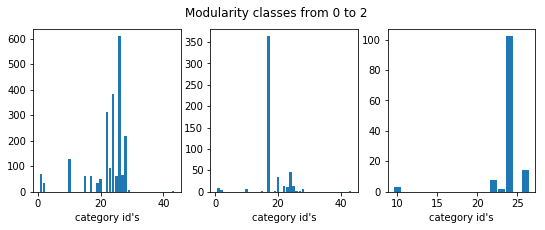

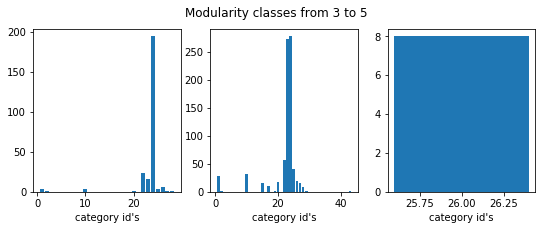

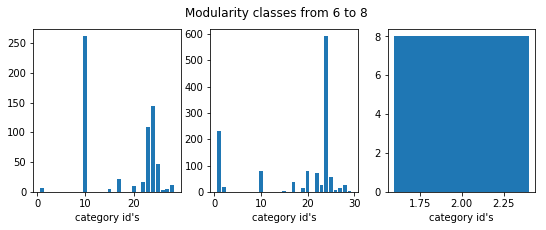

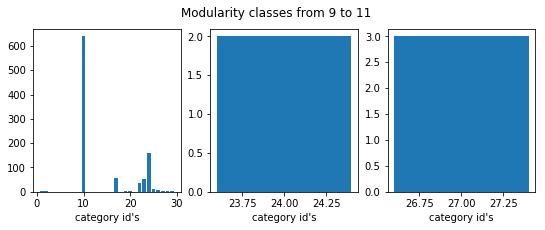

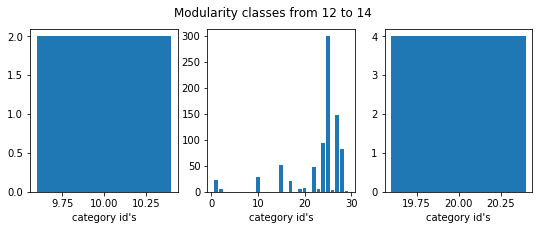

NameError: name 'avgs' is not defined

In [5]:
#1
lens1 = categoriesFigures(subNodes1, 5)

print("Number of categories per cluster")
print(lens1)
print("\nAverage categories")
print(np.mean(lens1))

In [ ]:
#2 
lens2 = categoriesFigures(subNodes2, 9)

print("Number of categories per cluster")
print(lens2)
print("\nAverage categories")
print(np.mean(lens2))

### Second Conclusion

Which channels are associated to each cluster?

In [ ]:
def channelsFigures(subNodes, max_range):
    subplots = [131,132,133]
    cs = []
    for j in range(0,max_range):
        plt.figure(1, figsize=(9, 3))
        c1 = j*3
        for i in range(0,3):
            #count number of categories for each subdataframe
            no = subNodes[c1+i]['channel_title'].value_counts()
            cs.append(len(no))
            plt.subplot(subplots[i])
            names = no.index.tolist()
            values = no.values.tolist()
            plt.bar(names, values)
            plt.xlabel("channels")
            frame1 = plt.gca()
            frame1.axes.xaxis.set_ticklabels([])
        c2 = c1+2;
        plt.suptitle("Modularity classes from "+ str(c1) + " to "+ str(c2) )
        plt.show()
    return cs

In [ ]:
cs1 = channelsFigures(subNodes1,5)

print("Number of channels per cluster")
print(cs1)
print("\nAverage channels")
print(np.mean(cs1))

In [ ]:
cs2 = channelsFigures(subNodes2,9)

print("Number of channels per cluster")
print(cs2)
print("\nAverage channels")
print(np.mean(cs2))

### Third Conclusion

Which tags are associated to each cluster?

This conclusion cannot be made with a dataset as big as GB + US.
So, I'll just use the smallest communities.

**(1)** 6 communities : [5,8,10,11,12,14]

**(2)** 6 communities (of 15 possible) : [2,6,10,14,20,24]

In [ ]:
import collections

subplots = [131,132,133]

def strToList(tags):
    l = len(tags)
    return tags[2:l-2].split('\', \'')

def createPairsGetTags(nodes,edges,type_c):
    tags = []
    for i, video1 in nodes.iterrows():
        for j, video2 in nodes.iterrows():
            if j > i:
                #verify if this pair has tags
                edge = edges[(edges['Source'] == video1.Id) & (edges['Target'] == video2.Id)]
                if edge.empty:
                    edge = edges[(edges['Source'] == video2.Id) & (edges['Target'] == video1.Id)]
                if edge.empty == False:
                    #this is bullshit
                    my_tags = []
                    if type_c == 1:
                        my_tags = edge.Tags.values[0]
                    else:
                        my_tags = edge.tags.values[0]
                    list_tags = strToList(my_tags)
                    tags = tags + list_tags
    return tags

def printResults(tags, c):
    counter = collections.Counter(tags)
    names = []
    values =[]
    for key, value in counter.items():
        names.append(key)
        values.append(value)
    plt.bar(names, values)
    plt.xlabel("tags")
    frame1 = plt.gca()
    frame1.axes.xaxis.set_ticklabels([])
    print("Community "+ str(c) +" Tag Names : ")
    print(names)
    
def tagsFigures(edges, subNodes, communities, type_c):
    counters = []
    for i in range(0,len(communities)):
        #videos dessa comunidade
        videos = subNodes[communities[i]]
        #usar o algoritmo para ir buscar tags dos videos
        tags = createPairsGetTags(videos,edges,type_c)
        #contar as tags e guardar num array por comunidade
        counter = collections.Counter(tags)
        counters.append(counter)
    return counters

In [ ]:
#smallest communities
small_cs1 = [5,8,10,11,12,14]
counters = tagsFigures(edges1,subNodes1,small_cs1, 1)

#print tags
for i in range(0, len(small_cs1)):
    print("Community "+ str(small_cs1[i]))
    print(counters[i])
    print("\n")

In [ ]:
#smallest communities (just 6 of 15)
small_cs2 = [2,6,10,14,20,24]
counters = tagsFigures(edges2,subNodes2,small_cs2,2)

#print tags
for i in range(0, len(small_cs2)):
    print("Community "+ str(small_cs2[i]))
    print(counters[i])
    print("\n")